The aim of this task is to apply the wavelet transform using Haar wavelet on a grayscale image and study its denoising capabilities. In the first part, we will perform a one-level wavelet decomposition on the image and apply a threshold to remove noise. We will then calculate the peak signal-to-noise ratio (PSNR) of the reconstructed image and plot it against the threshold value. In the second part, we will add Gaussian white noise to the image and repeat the process to find the optimal threshold value for denoising. Finally, we will perform a two-level wavelet decomposition and find the optimal threshold values for each level.

In [1]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
import pywt
import matplotlib.pyplot as plt

We begin by importing necessary libraries, including OpenCV for reading and displaying images, NumPy for numerical computations, scikit-image for calculating PSNR, and PyWavelets for performing wavelet decomposition.

In [3]:
img = cv2.imread('noisy.jpeg')
gray1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
noise = np.random.normal(0, 50, img.shape)
noisy_img = img.astype(np.float64) + noise
noisy_img = np.clip(noisy_img, 0, 255)
noisy_img = cv2.convertScaleAbs(noisy_img)


Next, we read the grayscale image and add Gaussian white noise with a mean of zero and standard deviation of 50.

In [4]:
gray = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)
coeffs = pywt.dwt2(gray, 'haar')
cA, (cH, cV, cD) = coeffs


We then performed one-level wavelet decomposition on the noisy image using the Haar wavelet.
We can now plot the evolution of the optimal threshold for denoising as a function of the noise level (D). We will repeat the entire process with two levels (L1 and L2) in the multiresolution analysis, and find the optimal thresholds T1 and T2. We will also investigate the relationship between T1 and T2.

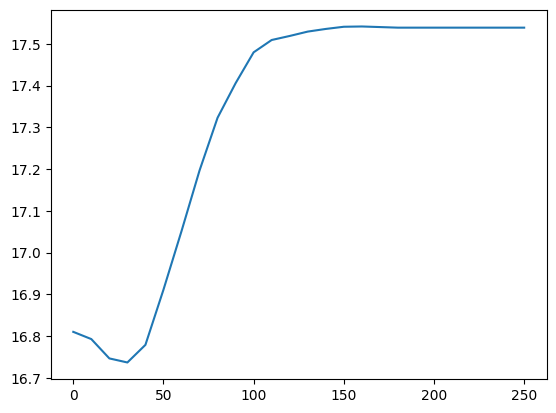

In [5]:
threshold_list = list(np.arange(0,256,10))
psnr=[]
bestpsnr=0
for threshold_ in threshold_list:
    cH_ = pywt.threshold(cH, threshold_,mode='hard')
    cV_ = pywt.threshold(cV, threshold_,mode='hard')
    cD_ = pywt.threshold(cD, threshold_,mode='hard')
    coeffs_ = cA, (cH_, cV_, cD_)
    compressed_image_ = pywt.idwt2(coeffs_, 'haar')
    compressed_image_ = np.uint8(compressed_image_)
    compressed_image_ = cv2.resize(compressed_image_, gray1.shape[::-1])
    psnr_ = peak_signal_noise_ratio(gray1, compressed_image_)
    psnr.append(psnr_)
    if psnr_>bestpsnr:
        bestthreshold=threshold_
        bestpsnr=psnr_
        bestcH=cH_
        bestcV=cV_
        bestcD=cD_
        bestcoeffs=coeffs_
        bestcompressed_image=compressed_image_
plt.plot(threshold_list,psnr)


We repeat the above process for the noisy image to find the optimal threshold value for denoising.

In [6]:
cv2.imshow('original', gray1)
cv2.imwrite('original.png', gray1)
cv2.imshow('noisy image', gray)
cv2.imwrite('noisy image.png', gray)
cv2.imshow('compressed', bestcompressed_image.astype(np.uint8))
cv2.imwrite('compressed image.png', bestcompressed_image)
cv2.imshow('low frequency coefficients', cv2.convertScaleAbs(((cA - np.min(cA)) / (np.max(cA) - np.min(cA))) * 255 ))
cv2.imwrite('low frequency coefficients.png', cv2.convertScaleAbs(((cA - np.min(cA)) / (np.max(cA) - np.min(cA))) * 255 ))
cv2.imshow('horizontal high frequency coefficients', cv2.convertScaleAbs(((bestcH - np.min(bestcH)) / (np.max(bestcH) - np.min(bestcH))) * 255 ))
cv2.imwrite('horizontal high frequency.png', cv2.convertScaleAbs(((bestcH - np.min(bestcH)) / (np.max(bestcH) - np.min(bestcH))) * 255 ))
cv2.imshow('vertical high frequency coefficients',  cv2.convertScaleAbs(((bestcV - np.min(bestcV)) / (np.max(bestcV) - np.min(bestcV))) * 255 ))
cv2.imwrite('vertical high frequency.png',cv2.convertScaleAbs(((bestcV - np.min(bestcV)) / (np.max(bestcV) - np.min(bestcV))) * 255 ))
cv2.imshow('diagonal high frequency coefficients',  cv2.convertScaleAbs(((bestcD - np.min(bestcD)) / (np.max(bestcD) - np.min(bestcD))) * 255 ))
cv2.imwrite('diagonal high frequency.png',cv2.convertScaleAbs(((bestcD - np.min(bestcD)) / (np.max(bestcD) - np.min(bestcD))) * 255 ))
cv2.waitKey(0)
cv2.destroyAllWindows()

print('best PSNR:', bestpsnr)
print('best threshlod:', bestthreshold)

C:\Users\hp\AppData\Local\Temp\ipykernel_4276\2812187253.py:13: RuntimeWarning: invalid value encountered in divide
  cv2.imshow('diagonal high frequency coefficients',  cv2.convertScaleAbs(((bestcD - np.min(bestcD)) / (np.max(bestcD) - np.min(bestcD))) * 255 ))
C:\Users\hp\AppData\Local\Temp\ipykernel_4276\2812187253.py:14: RuntimeWarning: invalid value encountered in divide
  cv2.imwrite('diagonal high frequency.png',cv2.convertScaleAbs(((bestcD - np.min(bestcD)) / (np.max(bestcD) - np.min(bestcD))) * 255 ))


In the end we just listed all the images of result.